In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


data/transactions_test.csv
data/transactions_train.csv
data/train_target.csv
data/small_group_description.csv
data/test.csv


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 9)

Populating the interactive namespace from numpy and matplotlib


In [4]:
transactions_train=pd.read_csv('data/transactions_train.csv')
train_target=pd.read_csv('data/train_target.csv')
print(transactions_train.head(),'\n',train_target.head())

   client_id  trans_date  small_group  amount_rur
0      33172           6            4      71.463
1      33172           6           35      45.017
2      33172           8           11      13.887
3      33172           9           11      15.983
4      33172          10           11      21.341 
    client_id  bins
0      24662     2
1       1046     0
2      34089     2
3      34848     1
4      47076     3


In [5]:
# день недели -from dj_sdsj01_visual
# +6 чтобы подогнать максимум в пятницу
transactions_train['dayofweek'] = transactions_train['trans_date'].apply(lambda x: (x + 6) % 7)

4    4137792
3    3879517
5    3796904
2    3794513
1    3728485
0    3683643
6    3429723
Name: dayofweek, dtype: int64

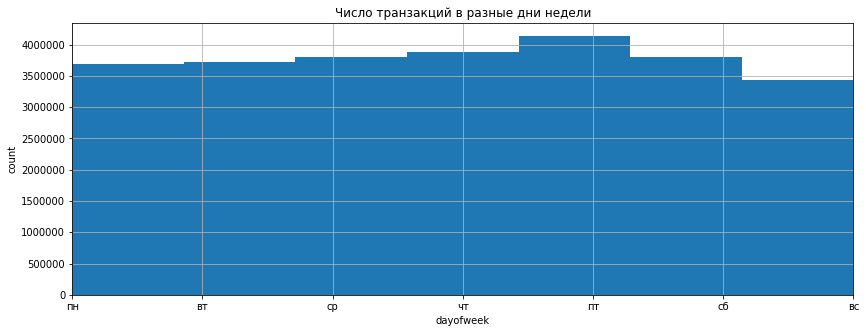

In [6]:
figsize(14, 5)
p = transactions_train.dayofweek.hist(bins=7) # там есть 60!
p.set_xlabel('dayofweek')
p.set_ylabel('count')
p.set_xlim([0, 6])
p.set_xticklabels([u'пн', u'вт', u'ср', u'чт', u'пт', u'сб', u'вс'])
p.set_title(u'Число транзакций в разные дни недели')
transactions_train.dayofweek.value_counts()

In [7]:
##временно приклеим столбец с ответами - НЕ ЗАБЫТЬ УДАЛИТЬ!
transactions_train=pd.merge(transactions_train,train_target,on='client_id')

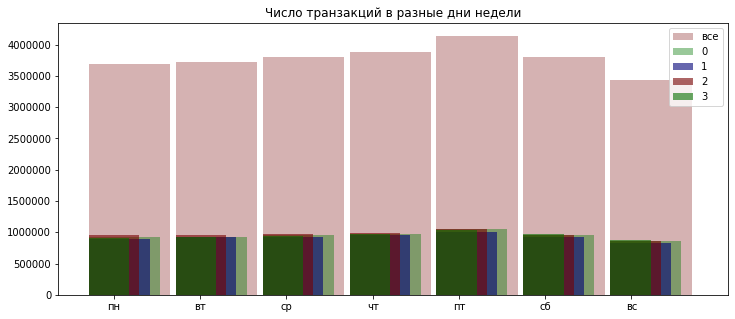

In [8]:
figsize(12,5)
plt.hist(transactions_train.dayofweek.values, bins=7, color='#770000', label=u'все', alpha=0.3, width=0.8) # , histtype='stepfilled', normed=True,
plt.hist(transactions_train[transactions_train.bins==0].dayofweek.values, bins=7, color='#007700', label=u'0', alpha=0.4, width=0.7)
plt.hist(transactions_train[transactions_train.bins==1].dayofweek.values, bins=7, color='#000077', label=u'1', alpha=0.6, width=0.6)
plt.hist(transactions_train[transactions_train.bins==2].dayofweek.values, bins=7, color='#770000', label=u'2', alpha=0.6, width=0.5)
plt.hist(transactions_train[transactions_train.bins==3].dayofweek.values, bins=7, color='#077000', label=u'3', alpha=0.6, width=0.4)
plt.xticks(0.25+ 0.85*np.arange(7), [u'пн', u'вт', u'ср', u'чт', u'пт', u'сб', u'вс']) # , rotation='vertical'
plt.title(u'Число транзакций в разные дни недели')
plt.legend()

#transactions_train.drop(['bins'], axis=1, inplace=True)

In [9]:
# число дней
transactions_train.trans_date.nunique()

730

727    52330
726    50789
728    49675
725    49452
691    49207
Name: trans_date, dtype: int64

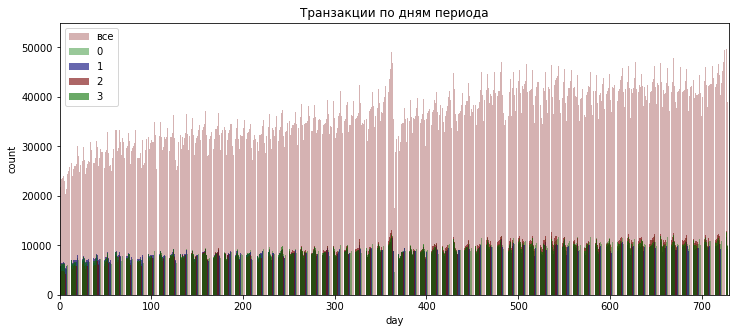

In [10]:
figsize(12,5)
plt.hist(transactions_train.trans_date.values, bins=730, color='#770000', label=u'все', alpha=0.3, width=0.9) # , histtype='stepfilled', normed=True,
plt.hist(transactions_train[transactions_train.bins==0].trans_date.values, bins=730, color='#007700', label=u'0', alpha=0.4, width=0.7)
plt.hist(transactions_train[transactions_train.bins==1].trans_date.values, bins=730, color='#000077', label=u'1', alpha=0.6, width=0.6)
plt.hist(transactions_train[transactions_train.bins==2].trans_date.values, bins=730, color='#770000', label=u'2', alpha=0.6, width=0.5)
plt.hist(transactions_train[transactions_train.bins==3].trans_date.values, bins=730, color='#077000', label=u'3', alpha=0.6, width=0.4)
plt.xlabel('day')
plt.ylabel('count')
plt.title(u'Транзакции по дням периода')
plt.legend()
plt.xlim([0, 730])
# новый год????
#plt.xlim([350, 350+130])
transactions_train['trans_date'].value_counts()[:5]

#transactions_train.drop(['bins'], axis=1, inplace=True)

In [11]:
tmp = transactions_train.groupby('client_id')
#обращение к полям после groupby только через функции-агрегаты
f1 = tmp.amount_rur.count().values
f2 = tmp.amount_rur.mean().values
g = tmp.bins.mean().values

Text(0, 0.5, '~ log средняя транзакция')

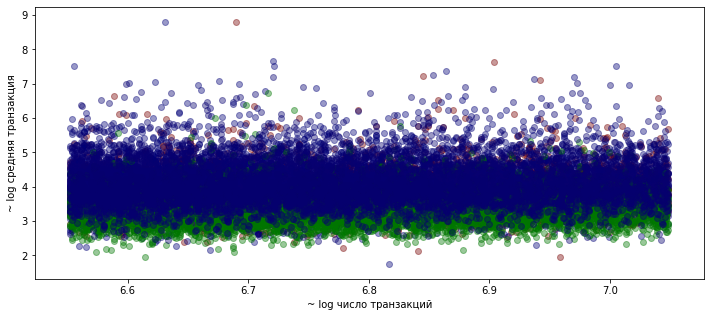

In [12]:
plt.scatter(np.log(f1[g==0]+1), np.sign(f2[g==0])*np.log(np.abs(f2[g==0])+1), c='#770000',alpha=0.4)
plt.scatter(np.log(f1[g==1]+1), np.sign(f2[g==1])*np.log(np.abs(f2[g==1])+1), c='#000077',alpha=0.4)
plt.scatter(np.log(f1[g==2]+1), np.sign(f2[g==2])*np.log(np.abs(f2[g==2])+1), c='#007700',alpha=0.4)
plt.scatter(np.log(f1[g==3]+1), np.sign(f2[g==3])*np.log(np.abs(f2[g==3])+1), c='#070070',alpha=0.4)
plt.xlabel(u'~ log число транзакций')
plt.ylabel(u'~ log средняя транзакция')

#transactions_train.drop(['bins'], axis=1, inplace=True)

In [13]:
desc = pd.read_csv('data/small_group_description.csv')
desc.head(15)

,small_group,small_group_code
0,Зоотовары,0
1,Сетевые супермаркеты и продуктовые магазины,1
2,Обслуживание существующего автомобиля (АЗС),2
3,Оплата телефона и связи,3
4,Аптеки,4
5,Авиабилеты,5
6,Duty-free,6
7,Страховка,7
8,Спорт,8
9,Универсальные товары,9


,amount_rur,small_group,small_group_code
1,8131374,Сетевые супермаркеты и продуктовые магазины,1
11,3202881,Фастфуд и кафе,11
3,2428984,Оплата телефона и связи,3
15,1427077,Несетевые супермаркеты и продуктовые магазины,15
4,1207604,Аптеки,4
18,1158512,Рестораны и кафе,18
2,908408,Обслуживание существующего автомобиля (АЗС),2
12,773805,Такси и каршеринги,12
25,702896,Метро (паромы и Ж\Д аналоги),25
9,689342,Универсальные товары,9


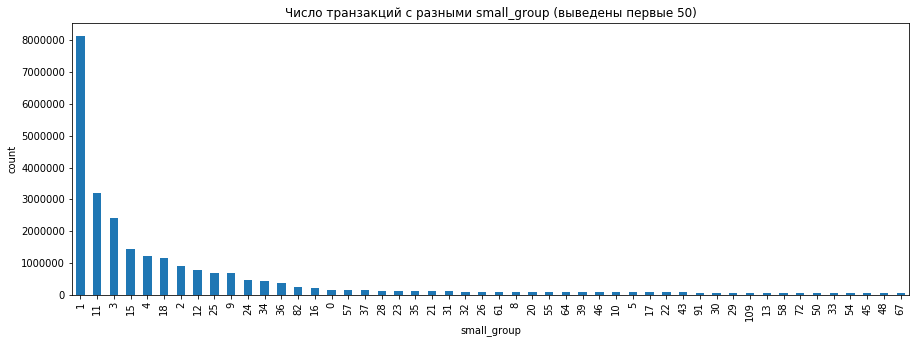

In [15]:
# Популярные small_group

tmp = transactions_train.groupby('small_group').amount_rur.count()
tmp.sort_values(ascending=False, inplace = True)
figsize(15, 5)
tmp[:50].plot(kind='bar') ##### 50!
# plt.bar(np.arange(len(f)), f) f = tmp.values
plt.xlabel('small_group')
plt.ylabel('count')
plt.title('Число транзакций с разными small_group (выведены первые 50)')
pd.merge(tmp[:15], desc, left_index=True, right_on='small_group_code')
# plt.plot(np.sort(tmp.amount_rur.sum().values))

In [16]:
pd.crosstab(transactions_train.small_group, transactions_train.bins).reset_index()

bins,small_group,0,1,2,3
0,0,36085,62185,22489,45014
1,1,1847354,2344264,1918899,2020857
2,2,248933,234336,143942,281197
3,3,581206,600087,610782,636909
4,4,271905,400057,221162,314480
...,...,...,...,...,...
197,198,2,2,1,4
198,199,0,0,0,1
199,200,0,0,0,1
200,202,0,1,0,1


In [19]:
transactions_train.describe()

,client_id,trans_date,small_group,amount_rur,dayofweek,bins
count,2.645058e+07,2.645058e+07,2.645058e+07,2.645058e+07,2.645058e+07,2.645058e+07
mean,2.500256e+04,3.926793e+02,1.427400e+01,5.586215e+01,2.989352e+00,1.505765e+00
std,1.444861e+04,2.070200e+02,2.046108e+01,3.694852e+02,1.964226e+00,1.119774e+00
min,4.000000e+00,0.000000e+00,0.000000e+00,1.000000e-03,0.000000e+00,0.000000e+00
25%,1.251900e+04,2.200000e+02,1.000000e+00,9.057000e+00,1.000000e+00,0.000000e+00
50%,2.503200e+04,4.070000e+02,9.000000e+00,1.988200e+01,3.000000e+00,2.000000e+00
75%,3.748900e+04,5.720000e+02,1.800000e+01,4.579500e+01,5.000000e+00,3.000000e+00
max,4.999800e+04,7.290000e+02,2.030000e+02,4.000868e+05,6.000000e+00,3.000000e+00


import seaborn as sns
sns.pairplot(transactions_train['cliend_id','amount_rur','dayofweek'], hue="bins")

In [401]:
# small_group по возрастным группам
tmp = pd.merge(pd.crosstab(transactions_train.small_group, transactions_train.bins).reset_index(), desc, left_on='small_group', right_on='small_group_code')
tmp.drop(['small_group_x'], axis=1,inplace=True)
tmp.rename(columns={"small_group_y": "small_group"}, inplace=True)
tmp



,0,1,2,3,small_group,small_group_code
0,36085,62185,22489,45014,Зоотовары,0
1,1847354,2344264,1918899,2020857,Сетевые супермаркеты и продуктовые магазины,1
2,248933,234336,143942,281197,Обслуживание существующего автомобиля (АЗС),2
3,581206,600087,610782,636909,Оплата телефона и связи,3
4,271905,400057,221162,314480,Аптеки,4
...,...,...,...,...,...,...
197,2,2,1,4,Наружная реклама и плоттерная резка,198
198,0,0,0,1,Услуги починки (металлические изделия),199
199,0,0,0,1,Телеграф,200
200,0,1,0,1,Скорая помощь,202


In [402]:
%%time
#one-to-one бинарные коэффициенты различаемости
#abs(tmp[0.0] - tmp[1.0])/(tmp[0.0] + tmp[1.0])
tmp['k01'] = (abs(tmp[0.0] - tmp[1.0])/(tmp[0.0] + tmp[1.0]))
tmp['k02'] = (abs(tmp[0.0] - tmp[2.0])/(tmp[0.0] + tmp[2.0]))
tmp['k12'] = (abs(tmp[1.0] - tmp[2.0])/(tmp[1.0] + tmp[2.0]))
tmp['k13'] = (abs(tmp[1.0] - tmp[3.0])/(tmp[1.0] + tmp[3.0]))
tmp['k23'] = (abs(tmp[2.0] - tmp[3.0])/(tmp[2.0] + tmp[3.0]))
tmp['k30'] = (abs(tmp[3.0] - tmp[0.0])/(tmp[3.0] + tmp[0.0]))

#one-to-all коэффициенты различаемости
tmp['k0'] = (abs(tmp[0.0])/(tmp[0.0] + tmp[1.0] + tmp[2.0] + tmp[3.0]))
tmp['k1'] = (abs(tmp[1.0])/(tmp[0.0] + tmp[1.0] + tmp[2.0] + tmp[3.0]))
tmp['k2'] = (abs(tmp[2.0])/(tmp[0.0] + tmp[1.0] + tmp[2.0] + tmp[3.0]))
tmp['k3'] = (abs(tmp[3.0])/(tmp[0.0] + tmp[1.0] + tmp[2.0] + tmp[3.0]))

tmp = tmp[(tmp[0.0] + tmp[1.0] + tmp[2.0] + tmp[3.0]) > 150] # е. достаточно статистики

tmp = tmp.assign(kmax=tmp.loc[:,'k01':'k3'].max(axis=1))

#tmp.loc[:,'k01':'k3'].max(axis=1)
#np.amax(tmp.loc[:,'k01':'k3'], axis=1)

tmp.sort_values('kmax',  ascending=False, inplace=True)

tmp.columns = [u'0', u'1', u'2', u'3', u'small_group', u'small_group_code', u'k01',u'k02',u'k12',u'k13',u'k23',u'k30',u'k0',u'k1',u'k2',u'k3',u'kmax']
tmp.set_index(tmp.small_group_code, inplace=True)
del tmp['small_group_code']
#tmp.drop(['kmax'], axis=1, inplace=True)
tmp.fillna(0)
tmp

CPU times: user 18.9 ms, sys: 389 µs, total: 19.2 ms
Wall time: 16.3 ms


,0,1,2,3,small_group,k01,k02,k12,k13,k23,k30,k0,k1,k2,k3,kmax
small_group_code,,,,,,,,,,,,,,,,
139,695,987,87,2745,Судебные расходы и алименты,0.173603,0.777494,0.837989,0.471061,0.938559,0.595930,0.153965,0.218653,0.019273,0.608108,0.938559
169,103,49,5,132,Центры развития и детские сады,0.355263,0.907407,0.814815,0.458564,0.927007,0.123404,0.356401,0.169550,0.017301,0.456747,0.927007
94,167,309,25,379,Охранные услуги,0.298319,0.739583,0.850299,0.101744,0.876238,0.388278,0.189773,0.351136,0.028409,0.430682,0.876238
147,4204,595,7677,2405,Биржевые и трейдинг услуги,0.752032,0.292315,0.856141,0.603333,0.522912,0.272205,0.282508,0.039984,0.515893,0.161615,0.856141
134,42,185,15,102,Строительные материалы (лакокрасочные материалы),0.629956,0.473684,0.850000,0.289199,0.743590,0.416667,0.122093,0.537791,0.043605,0.296512,0.850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,19010,20522,17203,20381,Мобильная техника,0.038247,0.049899,0.087979,0.003447,0.084557,0.034805,0.246512,0.266119,0.223080,0.264290,0.266119
9,169364,182389,159302,178287,Универсальные товары,0.037029,0.030615,0.067567,0.011373,0.056237,0.025667,0.245689,0.264584,0.231093,0.258634,0.264584
72,14442,12463,13706,14462,Театры и другие события,0.073555,0.026148,0.047499,0.074243,0.026839,0.000692,0.262234,0.226300,0.248870,0.262597,0.262597


Text(0.5, 1.0, 'различаемость возрастных групп по small_group')

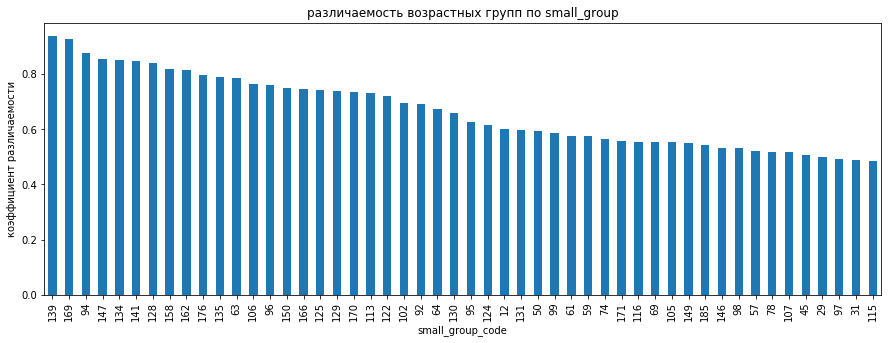

In [403]:
p = tmp[:50].kmax.plot(kind='bar')
p.set_ylabel(u'коэффициент различаемости')
p.set_title(u'различаемость возрастных групп по small_group')

139,169,94,147,134,141,128,158,162,176,135,63,106,96,150,166,125,129,170,113,122,102,92,64,130,95,124,12,131,50,99,61,59,74,171,116,69,105,149,185,146,98,57,78,107,45,29,97,31,115

[.] notation
CPU times: user 18.4 ms, sys: 7.42 ms, total: 25.8 ms
Wall time: 22.8 ms
CPU times: user 22.5 ms, sys: 4.38 ms, total: 26.9 ms
Wall time: 23.5 ms

.loc[] notation   
CPU times: user 25.8 ms, sys: 3.94 ms, total: 29.8 ms
Wall time: 26.2 ms
CPU times: user 28.5 ms, sys: 2.12 ms, total: 30.6 ms
Wall time: 27.2 ms

    

%%time
#one-to-one бинарные коэффициенты различаемости
#abs(tmp[0.0] - tmp[1.0])/(tmp[0.0] + tmp[1.0])
tmp['k01'] = (abs(tmp.loc[:,0] - tmp.loc[:,1])/(tmp.loc[:,0] + tmp.loc[:,1]))
tmp['k02'] = (abs(tmp.loc[:,0] - tmp.loc[:,2])/(tmp.loc[:,0] + tmp.loc[:,2]))
tmp['k12'] = (abs(tmp.loc[:,1] - tmp.loc[:,2])/(tmp.loc[:,1] + tmp.loc[:,2]))
tmp['k13'] = (abs(tmp.loc[:,1] - tmp.loc[:,3])/(tmp.loc[:,1] + tmp.loc[:,3]))
tmp['k23'] = (abs(tmp.loc[:,2] - tmp.loc[:,3])/(tmp.loc[:,2] + tmp.loc[:,3]))
tmp['k30'] = (abs(tmp.loc[:,3] - tmp.loc[:,0])/(tmp.loc[:,3] + tmp.loc[:,0]))

#one-to-all коэффициенты различаемости
tmp['k0'] = (abs(tmp.loc[:,0])/(tmp.loc[:,0] + tmp.loc[:,1] + tmp.loc[:,2] + tmp.loc[:,3]))
tmp['k1'] = (abs(tmp.loc[:,1])/(tmp.loc[:,0] + tmp.loc[:,1] + tmp.loc[:,2] + tmp.loc[:,3]))
tmp['k2'] = (abs(tmp.loc[:,2])/(tmp.loc[:,0] + tmp.loc[:,1] + tmp.loc[:,2] + tmp.loc[:,3]))
tmp['k3'] = (abs(tmp.loc[:,3])/(tmp.loc[:,0] + tmp.loc[:,1] + tmp.loc[:,2] + tmp.loc[:,3]))

tmp = tmp[(tmp.loc[:,0] + tmp.loc[:,1] + tmp.loc[:,2] + tmp.loc[:,3]) > 150] # е. достаточно статистики

#tmp.sort_values('k',  ascending=False, inplace=True)
#del tmp['gender']
tmp.columns = [u'0', u'1', u'2', u'3', u'small_group', u'small_group_code', u'k01',u'k02',u'k12',u'k13',u'k23',u'k30',u'k0',u'k1',u'k2',u'k3']
tmp.set_index(tmp.small_group_code, inplace=True)
del tmp['small_group_code']
#tmp.drop(['small_group_code'], axis=1, inplace=True)
tmp


/home/user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


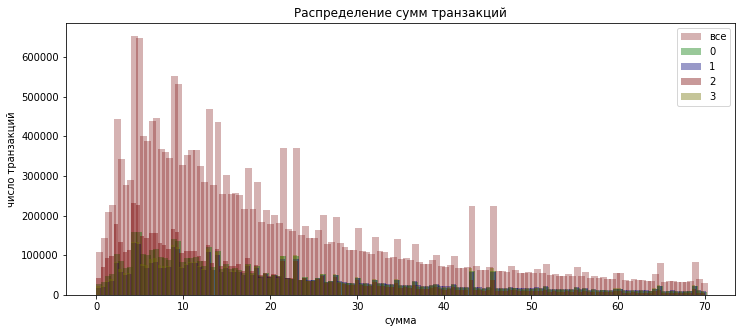

In [404]:
figsize(12,5)
# там есть 60!
plt.hist(transactions_train[transactions_train.amount_rur.abs()<70].amount_rur.values, bins=(69*2+1), color='#770000', label=u'все', alpha=0.3, width=0.8) # , histtype='stepfilled', normed=True,
plt.hist(transactions_train[transactions_train.amount_rur.abs()<70][transactions_train.bins==0].amount_rur.values, bins=(69*2+1), color='#007700', label=u'0', alpha=0.4, width=0.7)
plt.hist(transactions_train[transactions_train.amount_rur.abs()<70][transactions_train.bins==1].amount_rur.values, bins=(69*2+1), color='#000077', label=u'1', alpha=0.4, width=0.6)
plt.hist(transactions_train[transactions_train.amount_rur.abs()<70][transactions_train.bins==2].amount_rur.values, bins=(69*2+1), color='#770000', label=u'2', alpha=0.4, width=0.5)
plt.hist(transactions_train[transactions_train.amount_rur.abs()<70][transactions_train.bins==3].amount_rur.values, bins=(69*2+1), color='#707000', label=u'3', alpha=0.4, width=0.4)
plt.xlabel('сумма')
plt.ylabel('число транзакций')
plt.title(u'Распределение сумм транзакций')
plt.legend()
#plt.xlim([0, 24])
#transactions.amount.value_counts()[:5]

In [405]:
tmp = transactions_train.amount_rur.values
tmp

array([71.463, 45.017, 13.887, ...,  6.448, 24.669, 19.408])

Text(0.5, 1.0, 'Распределение сумм транзакций (небольшие суммы)')

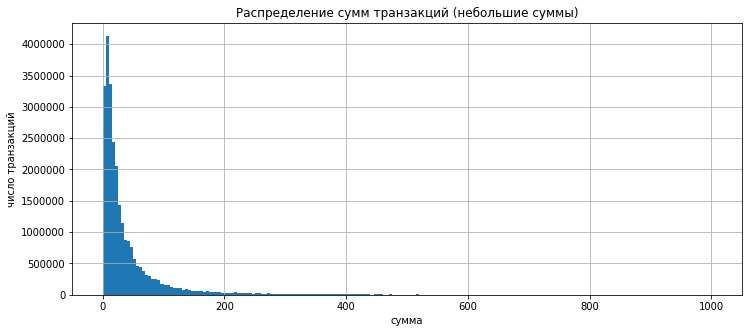

In [406]:
p = transactions_train[transactions_train.amount_rur<1000].amount_rur.hist(bins=200)
p.set_xlabel('сумма')
p.set_ylabel('число транзакций')
p.set_title('Распределение сумм транзакций (небольшие суммы)')

Text(0.5, 1.0, 'Распределение сумм транзакций (небольшие суммы)')

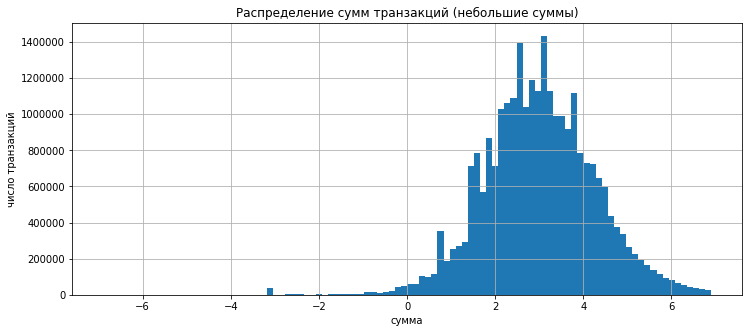

In [407]:
p = transactions_train[transactions_train.amount_rur<1000].amount_rur.apply(lambda x: np.log(x)).hist(bins=100)
p.set_xlabel('сумма')
p.set_ylabel('число транзакций')
p.set_title('Распределение сумм транзакций (небольшие суммы)')

1     7214065
2     4505266
3     1955314
4      684801
5      212980
6       62591
7       17804
8        4827
9        1336
10        377
Name: amount_rur, dtype: int64

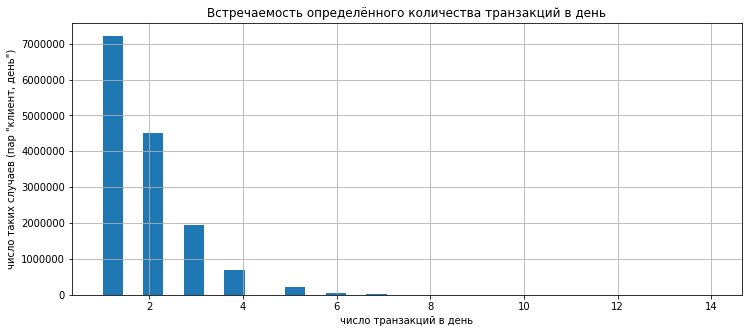

In [408]:
tmp = transactions_train.groupby(['trans_date', 'client_id']).amount_rur.count()
p = tmp[tmp<=30].hist(bins=30)
p.set_xlabel('число транзакций в день')
p.set_ylabel('число таких случаев (пар "клиент, день")')
p.set_title('Встречаемость определённого количества транзакций в день')
tmp.value_counts()[:10]

(0, 30)

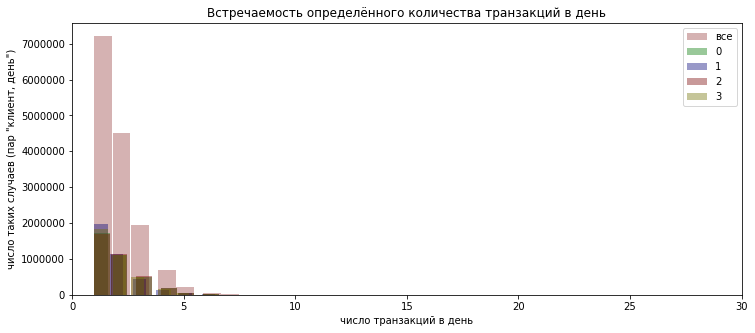

In [409]:
tmp = transactions_train.groupby(['trans_date', 'client_id']).amount_rur.count()
tmp1 = transactions_train[transactions_train.bins==0].groupby(['trans_date', 'client_id']).amount_rur.count()
tmp2 = transactions_train[transactions_train.bins==1].groupby(['trans_date', 'client_id']).amount_rur.count()
tmp3 = transactions_train[transactions_train.bins==2].groupby(['trans_date', 'client_id']).amount_rur.count()
tmp4 = transactions_train[transactions_train.bins==3].groupby(['trans_date', 'client_id']).amount_rur.count()

figsize(12,5)
# там есть 60!
plt.hist(tmp[tmp<31], bins=32, color='#770000', label=u'все', alpha=0.3, width=0.8) # , histtype='stepfilled', normed=True,
plt.hist(tmp1[tmp<31], bins=32, color='#007700', label=u'0', alpha=0.4, width=0.7)
plt.hist(tmp2[tmp<31], bins=32, color='#000077', label=u'1', alpha=0.4, width=0.6)
plt.hist(tmp3[tmp<31], bins=32, color='#770000', label=u'2', alpha=0.4, width=0.7)
plt.hist(tmp4[tmp<31], bins=32, color='#707000', label=u'3', alpha=0.4, width=0.6)
plt.xlabel(u'число транзакций в день')
plt.ylabel(u'число таких случаев (пар "клиент, день")')
plt.title(u'Встречаемость определённого количества транзакций в день')
plt.legend()
plt.xlim([0, 30])

In [410]:
tmp = transactions_train.groupby(['trans_date', 'client_id']).amount_rur.count()
tmp = tmp.unstack()
tmp[:5]

client_id,4,6,7,10,11,12,13,14,17,18,...,49986,49987,49988,49989,49990,49993,49995,49996,49997,49998
trans_date,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,2.0,NaN,2.0,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,1.0,1.0,...,NaN,NaN,1.0,1.0,NaN,1.0,2.0,2.0,1.0,NaN
2,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,...,2.0,NaN,2.0,NaN,NaN,NaN,2.0,3.0,1.0,NaN
3,1.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,1.0,...,NaN,1.0,3.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN
4,1.0,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,2.0,...,NaN,2.0,2.0,NaN,NaN,2.0,1.0,1.0,NaN,NaN


In [411]:
user = transactions_train.client_id.unique()[100]

tr = transactions_train[transactions_train.client_id == user]
tr[:20]

,client_id,trans_date,small_group,amount_rur,dayofweek,bins
89274,46403,1,1,55.320,0,2
89275,46403,2,1,24.821,1,2
89276,46403,4,31,49.459,3,2
89277,46403,4,22,9.159,3,2
89278,46403,4,11,112.611,3,2
89279,46403,7,1,62.190,6,2
89280,46403,11,3,4.579,3,2
89281,46403,12,1,40.850,4,2
89282,46403,12,11,15.612,4,2
89283,46403,14,1,32.950,6,2


In [412]:
tmp = tr.small_group.value_counts()
tmp.to_dict()

df_smg = pd.DataFrame({'small_group':transactions_train.small_group.unique()})
df_smg['new'] = df_smg.small_group.map(tmp.to_dict())
df_smg.new.fillna(0, inplace=True)

#df_mcc.new.tolist()
df_smg['new'] = df_smg['new']/df_smg['new'].sum()
df_smg

,small_group,new
0,4,0.031900
1,35,0.000000
2,11,0.087379
3,18,0.015257
4,1,0.564494
...,...,...
197,200,0.000000
198,197,0.000000
199,202,0.000000
200,203,0.000000


(0, 100)

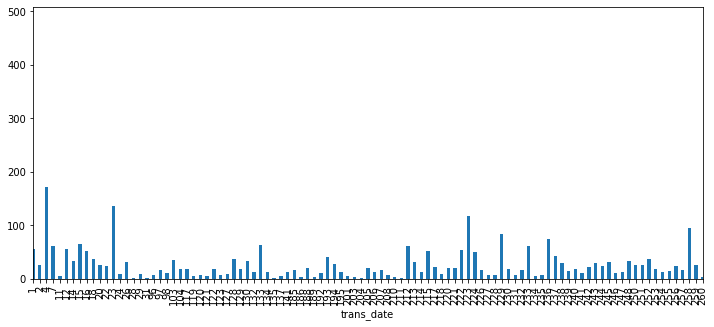

In [413]:
tmp = tr.groupby('trans_date').amount_rur.sum()
#lt.plot(tr.d)
p = tmp.plot(kind='bar')
p.set_xlim([0, 100])

In [414]:
tmp.to_frame()

,amount_rur
trans_date,
1,55.320
2,24.821
4,171.229
7,62.190
11,4.579
...,...
725,30.824
726,27.467
727,78.595


In [415]:
print ('Среднее число транзакций:')
print (mean(tmp.to_frame().amount_rur.value_counts()))
print (median(tmp.to_frame().amount_rur.value_counts()))
print (tr.shape[0])

Среднее число транзакций:
1.0545023696682465
1.0
721


# End of dj-initiated visualisations

In [416]:
#transactions_train['tr_month'] = (transactions_train['trans_date']/30).astype('int')


In [417]:
agg_features=transactions_train.groupby('client_id')['amount_rur'].agg(['sum','mean','std','min','max']).reset_index()
agg_features.head()

,client_id,sum,mean,std,min,max
0,4,28404.121,39.450168,73.511624,0.043,1341.802
1,6,15720.739,21.535259,26.200397,0.045,315.781
2,7,53630.036,69.379089,253.261383,0.043,4505.971
3,10,34419.365,48.752642,63.191701,0.045,654.893
4,11,26789.404,32.991877,107.395139,0.388,2105.058


In [418]:
counter_df_train=transactions_train.groupby(['client_id','small_group'])['amount_rur'].count()
cat_counts_train=counter_df_train.reset_index().pivot(index='client_id', \
                                                      columns='small_group',values='amount_rur')
cat_counts_train=cat_counts_train.fillna(0)
cat_counts_train.columns=['small_group_'+str(i) for i in cat_counts_train.columns]
cat_counts_train.head()

,small_group_0,small_group_1,small_group_2,small_group_3,small_group_4,small_group_5,small_group_6,small_group_7,small_group_8,small_group_9,...,small_group_192,small_group_193,small_group_195,small_group_196,small_group_197,small_group_198,small_group_199,small_group_200,small_group_202,small_group_203
client_id,,,,,,,,,,,,,,,,,,,,,
4,0.0,447.0,1.0,44.0,93.0,0.0,0.0,0.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2.0,397.0,0.0,172.0,10.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2.0,79.0,5.0,27.0,19.0,1.0,0.0,2.0,1.0,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,12.0,309.0,1.0,71.0,65.0,0.0,0.0,0.0,3.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,2.0,423.0,0.0,59.0,23.0,3.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [420]:
train=pd.merge(train_target,agg_features,on='client_id')
train=pd.merge(train,cat_counts_train.reset_index(),on='client_id')
train.head()

,client_id,bins,sum,mean,std,min,max,small_group_0,small_group_1,small_group_2,...,small_group_192,small_group_193,small_group_195,small_group_196,small_group_197,small_group_198,small_group_199,small_group_200,small_group_202,small_group_203
0,24662,2,30254.011,34.774725,72.037354,0.074,1227.314,0.0,174.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1046,0,42548.570,52.015367,106.540962,0.550,1210.506,1.0,187.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34089,2,26842.816,34.325852,59.927450,0.043,782.641,0.0,372.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,34848,1,15773.126,16.160990,14.224936,0.043,109.590,0.0,359.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47076,3,12488.375,15.929050,35.473591,0.432,541.165,0.0,378.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [421]:
transactions_test=pd.read_csv('data/transactions_test.csv')
transactions_test['tr_month'] = (transactions_test['trans_date']/30).astype('int')
test_id=pd.read_csv('data/test.csv')

In [422]:
transactions_train['trans_date'].max()

729

In [10]:
agg_features_test=transactions_test.groupby('client_id')['amount_rur'].agg(['sum','mean','std','min','max']).reset_index()
counter_df_test=transactions_test.groupby(['client_id','small_group'])['amount_rur'].count()
cat_counts_test=counter_df_test.reset_index().pivot(index='client_id', columns='small_group',values='amount_rur')
cat_counts_test=cat_counts_test.fillna(0)
cat_counts_test.columns=['small_group_'+str(i) for i in cat_counts_test.columns]
cat_counts_test.head()

,small_group_0,small_group_1,small_group_2,small_group_3,small_group_4,small_group_5,small_group_6,small_group_7,small_group_8,small_group_9,...,small_group_192,small_group_193,small_group_194,small_group_195,small_group_196,small_group_197,small_group_198,small_group_200,small_group_201,small_group_202
client_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,226.0,1.0,36.0,9.0,0.0,0.0,0.0,2.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30.0,326.0,0.0,40.0,56.0,0.0,0.0,0.0,0.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.0,242.0,1.0,50.0,48.0,4.0,0.0,6.0,1.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,156.0,83.0,48.0,31.0,2.0,0.0,1.0,2.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,16.0,398.0,1.0,23.0,25.0,0.0,0.0,0.0,5.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
test=pd.merge(test_id,agg_features_test,on='client_id')
test=pd.merge(test,cat_counts_test.reset_index(),on='client_id')

#aggregates shitstorm train
for i in transactions_train.small_group.unique():
    temp = transactions_train[transactions_train.small_group==i]
    temp = temp.groupby(['client_id'])['amount_rur'].agg(['sum','mean']).reset_index()
    temp.columns = ['client_id','sum_sg{}'.format(i),'mean_sg{}'.format(i)]
    train=pd.merge(train,temp,how='left',on='client_id')

for i in transactions_train.small_group.unique():
    train['mean_sg{}_frac'.format(i)] = train['mean_sg{}'.format(i)] / train['mean']
    train['sum_sg{}_frac'.format(i)] = train['sum_sg{}'.format(i)] / train['sum']

In [12]:
len(train)

30000

#aggregates shitstorm test
for i in transactions_test.small_group.unique():
    temp = transactions_test[transactions_test.small_group==i]
    temp = temp.groupby(['client_id'])['amount_rur'].agg(['sum','mean']).reset_index()
    temp.columns = ['client_id','sum_sg{}'.format(i),'mean_sg{}'.format(i)]
    test=pd.merge(test,temp,how='left',on='client_id')

for i in transactions_test.small_group.unique():
    test['mean_sg{}_frac'.format(i)] = test['mean_sg{}'.format(i)] / train['mean']
    test['sum_sg{}_frac'.format(i)] = test['sum_sg{}'.format(i)] / train['sum']

train = train.fillna(0)
test = test.fillna(0)

In [13]:
common_features=list(set(train.columns).intersection(set(test.columns)))
#common_features.remove('client_id')
common_features

['small_group_132',
 'small_group_37',
 'small_group_116',
 'small_group_85',
 'small_group_9',
 'small_group_74',
 'small_group_19',
 'small_group_50',
 'small_group_123',
 'small_group_41',
 'small_group_18',
 'small_group_76',
 'small_group_68',
 'small_group_102',
 'small_group_32',
 'small_group_159',
 'small_group_98',
 'small_group_137',
 'small_group_30',
 'small_group_178',
 'small_group_188',
 'small_group_43',
 'small_group_38',
 'small_group_46',
 'small_group_112',
 'small_group_180',
 'small_group_185',
 'small_group_69',
 'small_group_34',
 'small_group_23',
 'small_group_139',
 'small_group_142',
 'small_group_149',
 'small_group_153',
 'small_group_190',
 'small_group_28',
 'small_group_177',
 'small_group_125',
 'small_group_10',
 'min',
 'small_group_133',
 'small_group_169',
 'small_group_192',
 'small_group_58',
 'small_group_92',
 'small_group_182',
 'small_group_21',
 'small_group_52',
 'small_group_155',
 'small_group_16',
 'small_group_64',
 'small_group_73',
 

In [14]:
y_train_all=train['bins']
X_train_all=train[common_features]

#from sklearn.model_selection import train_test_split
#X_train,X_validation, y_train, y_validation = train_test_split(X_train_all, y_train_all, test_size=.33, random_state=1)

In [15]:
X_test=test[common_features]

In [16]:
#del all_tr, all_df

In [17]:
all_tr=pd.concat([transactions_train,transactions_test]).reset_index()
all_df=pd.concat([X_train_all, X_test]).reset_index()

In [ ]:
all_tr['tr_month'] = (all_tr['trans_date']/30).astype('int')
all_df['tr_month'] = (all_df['trans_date']/30).astype('int')

In [18]:
#aggregates shitstorm
from multiprocessing import Pool
from multiprocessing.dummy import Pool as ThreadPool

from tqdm import tqdm

#step I - агрегаты по small_group
#for i in all_tr.small_group.unique():
#    temp = all_tr[all_tr.small_group==i]
#    temp = temp.groupby(['client_id'])['amount_rur'].agg(['sum','mean']).reset_index()
#    temp.columns = ['client_id','sum_sg{}'.format(i),'mean_sg{}'.format(i)]
#    all_df=pd.merge(all_df,temp,how='left',on='client_id')
#    all_df['mean_sg{}_frac'.format(i)] = all_df['mean_sg{}'.format(i)] / all_df['mean']
#    all_df['sum_sg{}_frac'.format(i)] = all_df['sum_sg{}'.format(i)] / all_df['sum']#было 0.57, стало 0,59

def pooled_func1(pooled_args):
    temp = all_tr[all_tr.small_group==pooled_args]
    temp = temp.groupby(['client_id'])['amount_rur'].agg(['sum','mean']).reset_index()
    temp.columns = ['client_id','sum_sg{}'.format(pooled_args),'mean_sg{}'.format(pooled_args)]
    return temp 
#multiprocessing
map_args = all_tr.small_group.unique()
with Pool(24) as pool:  # Create a multiprocessing Pool
    records = pool.map(pooled_func1, map_args)# process data_inputs iterable with pool
for i in range(len(records)):    
    all_df=pd.merge(all_df,records[i],how='left',on='client_id')
for i in map_args:
    all_df['mean_sg{}_frac'.format(i)] = all_df['mean_sg{}'.format(i)] / all_df['mean']
    all_df['sum_sg{}_frac'.format(i)] = all_df['sum_sg{}'.format(i)] / all_df['sum']#было 0.57, стало 0,59
    
    
    
#step II - агрегаты по месяцам
#for i in all_tr.tr_month.unique():
#    temp = all_tr[all_tr.tr_month==i]
#    temp = temp.groupby(['client_id'])['amount_rur'].agg(['sum','mean']).reset_index()
#    temp.columns = ['client_id','sum_mon{}'.format(i),'mean_mon{}'.format(i)]
#    all_df=pd.merge(all_df,temp,how='left',on='client_id')#было 0.59, стало хз, но 0.594

def pooled_func2(pooled_args):
    temp = all_tr[all_tr.tr_month==pooled_args]
    temp = temp.groupby(['client_id'])['amount_rur'].agg(['sum','mean']).reset_index()
    temp.columns = ['client_id','sum_mon{}'.format(pooled_args),'mean_mon{}'.format(pooled_args)]
    return temp 
#multiprocessing
map_args = all_tr.tr_month.unique()
with Pool(24) as pool:  # Create a multiprocessing Pool
    records = pool.map(pooled_func2, map_args)# process data_inputs iterable with pool
for i in range(len(records)):    
    all_df=pd.merge(all_df,records[i],how='left',on='client_id')#было 0.59, стало хз, но 0.594


all_df = all_df.fillna(0)
X_train_all = all_df[:len(X_train_all)]
X_test = all_df[len(X_train_all):]
del all_tr, all_df

In [ ]:
#OOM if all small groups
from multiprocessing import Pool
from tqdm import tqdm

all_tr=pd.concat([transactions_train,transactions_test]).reset_index()
all_df=pd.concat([X_train_all, X_test]).reset_index()

def pooled_func3(pooled_args):
    temp0 = all_tr[all_tr.small_group==pooled_args]
    for i in temp0.tr_month.unique():
        temp = temp0[temp0.tr_month==i]
        temp = temp.groupby(['client_id',])['amount_rur'].agg(['sum','mean']).reset_index()
        temp.columns = ['client_id','sum_sg{}_m{}'.format(pooled_args,i),'mean_sg{}_m{}'.format(pooled_args,i)]
    return temp 

#multiprocessing
map_args = all_tr.small_group.unique()
with Pool(24) as pool:  # Create a multiprocessing Pool
    records = pool.map(pooled_func3, map_args)# process data_inputs iterable with pool
for i in range(len(records)):    
    all_df=pd.merge(all_df,records[i],how='left',on='client_id')

#for j in all_tr.small_group.unique():
#    temp0 = all_tr[all_tr.small_group==j]
#    for i in temp0.tr_month.unique():
#        temp = temp0[temp0.tr_month==i]
#        temp = temp.groupby(['client_id',])['amount_rur'].agg(['sum','mean']).reset_index()
#        temp.columns = ['client_id','sum_sg{}_m{}'.format(j,i),'mean_sg{}_m{}'.format(j,i)]
#        all_df=pd.merge(all_df,temp,how='left',on='client_id')
    
all_df = all_df.fillna(0)
X_train_all = all_df[:len(X_train_all)]
X_test = all_df[len(X_train_all):]
del all_tr, all_df

In [ ]:
len(records)

In [ ]:
print(X_train_all.columns)

In [ ]:
#all_tr=pd.concat([transactions_train,transactions_test]).reset_index()
#all_df=pd.concat([X_train_all, X_test]).reset_index()
#all_tr['client_mon_gr_mean'] = all_tr.groupby(['client_id','tr_month','small_group'])['amount_rur'].transform('mean')
#all_tr['client_mon_gr_sum'] = all_tr.groupby(['client_id','tr_month','small_group'])['amount_rur'].transform('sum')
#all_tr['client_mon_mean'] = all_tr.groupby(['client_id','tr_month'])['amount_rur'].transform('mean')
#all_tr['client_mon_sum'] = all_tr.groupby(['client_id','tr_month'])['amount_rur'].transform('sum')
#all_tr['client_gr_mean'] = all_tr.groupby(['client_id','small_group'])['amount_rur'].transform('mean')
#all_tr['client_gr_sum'] = all_tr.groupby(['client_id','small_group'])['amount_rur'].transform('sum')


In [ ]:

#all_df=pd.merge(all_df,all_tr,how='left',on='client_id')
#all_df = all_df.fillna(0)
#X_train_all = all_df[:len(X_train_all)]
#X_test = all_df[len(X_train_all):]
#del all_tr, all_df

In [ ]:
len(X_train_all)

In [ ]:
X_train_all = X_train_all.drop(['index','level_0'], axis=1)

In [ ]:
X_train_all.head()

%%time
from sklearn.model_selection import train_test_split
X_train,X_validation, y_train, y_validation = train_test_split(X_train_all, y_train_all, test_size=.33, random_state=1)
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)

param = {'task': 'train',
    #'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class':4,
    'n_estimators': 1200,
    'metric': 'multi_logloss',
    'n_jobs': -1,#new
    'verbose':-1,#new
    'learning_rate': 0.01,#0.005,
    'max_depth': 9,#50,
    'num_leaves': 2**8}
param = {'task': 'train',
        #'boosting_type': 'gbdt',
        'objective': 'multiclass',
        'num_class':4,
        #'n_estimators': 120,
        'metric': 'multi_logloss',
        'learning_rate': 0.005,
        'max_depth': 50,
        'num_leaves': 900,
        'feature_fraction': 0.4,
        'bagging_fraction': 0.6,
        'bagging_freq': 7}    

model = lgb.train(param, d_train,100)
from sklearn.metrics import accuracy_score

import numpy as np
print('Train Accuracy:', accuracy_score(y_train, [np.argmax(line) for line in model.predict(X_train)]))
print('Validation Accuracy:', accuracy_score(y_validation, [np.argmax(line) for line in model.predict(X_validation)]))

In [ ]:
from collections import Counter
def get_class_weights(y):
    counter = Counter(y)
    majority = max(counter.values())
    return  {cls: round(float(majority)/float(count), 5) for cls, count in counter.items()}

class_weights = get_class_weights(y_train_all.values)
print(class_weights)

In [ ]:
#%%time
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
folds = KFold(n_splits=5)

param = {'task': 'train',
    #'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class':4,
    'n_estimators': 1200,
    'metric': 'multi_logloss',
    'n_jobs': -1,#new
    'verbose':-1,#new
    'learning_rate': 0.01,#0.005,
    'max_depth': 9,#50,
    'num_leaves': 2**8}

scores = list()
train_acc = list()
val_acc = list()
feature_importances = pd.DataFrame()
feature_importances['feature'] = X_train_all.columns

#training_start_time = time()
for fold, (trn_idx, test_idx) in enumerate(folds.split(X_train_all, y_train_all)):
    #start_time = time()
    print('Training on fold {}'.format(fold + 1))
    
    trn_data = lgb.Dataset(X_train_all.iloc[trn_idx], label=y_train_all.iloc[trn_idx])
    val_data = lgb.Dataset(X_train_all.iloc[test_idx], label=y_train_all.iloc[test_idx])
    clf = lgb.train(param, trn_data, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds=100)
    
    feature_importances['fold_{}'.format(fold + 1)] = clf.feature_importance()
    scores.append(clf.best_score['valid_1']['multi_logloss'])
    train_acc.append(accuracy_score(y_train_all.iloc[trn_idx], [np.argmax(line) for line in clf.predict(X_train_all.iloc[trn_idx])]))
    val_acc.append(accuracy_score(y_train_all.iloc[test_idx], [np.argmax(line) for line in clf.predict(X_train_all.iloc[test_idx])]))
    
    #print('Fold {} finished in {}'.format(fold + 1, str(datetime.timedelta(seconds=time() - start_time))))
print('-' * 30)
print('Training has finished.')
#print('Total training time is {}'.format(str(datetime.timedelta(seconds=time() - training_start_time))))
print('Mean AUC:', np.mean(scores))
print('-' * 30)
print('Mean train ACC:', np.mean(train_acc))
print('Mean val ACC:', np.mean(val_acc))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances['average'] = feature_importances[['fold_{}'.format(fold + 1) for fold in range(folds.n_splits)]].mean(axis=1)
#feature_importances.to_csv('feature_importances.csv')

plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature');
plt.title('50 TOP feature importance over {} folds average'.format(folds.n_splits));

In [ ]:
from sklearn.metrics import accuracy_score

import numpy as np
print('Train Accuracy:', accuracy_score(y_train, [np.argmax(line) for line in model.predict(X_train)]))
print('Validation Accuracy:', accuracy_score(y_validation, [np.argmax(line) for line in model.predict(X_validation)]))